### Create High Dimensional Dynamical Systems

In [2]:
%load_ext autoreload
%autoreload 2
    
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import scipy
import pickle
from pathlib import Path
from tqdm import tqdm

from kcm.dynamical_systems import create_three_dimensional_dataset, plot_3d_trajectories, plot_3d_time_colored_trajectories
from kcm.dynamical_systems import (
    lorenz, lorenz_params,
    rossler,rossler_params,
    chen,chen_params,
    chua,chua_params,
    halvorsen,halvorsen_params,
    sprott_a,sprott_a_params,
    tigan,tigan_params,
    cross_coupled,cross_coupled_params,
)



plt.style.use('dark_background')

In [3]:
header = {
    "seed": 42,
    "scipy_version": scipy.__version__,
    "numpy_version": np.__version__,
}
header

{'seed': 42, 'scipy_version': '1.15.3', 'numpy_version': '2.2.6'}

In [7]:
systems = {
    'lorenz' : (lorenz, lorenz_params),
    'rossler' : (rossler,rossler_params),
    'chen' : (chen,chen_params),
    # 'chua' : (chua,chua_params),
    'halvorsen' : (halvorsen,halvorsen_params),
    'sprott_a' : (sprott_a,sprott_a_params),
    'tigan' : (tigan,tigan_params),
    'cross_coupled' : (cross_coupled,cross_coupled_params)
}

In [8]:
n = 3000
begin = 0
end = 200
num_series = 250
noise_multiplier = 0.01 # 0, 0.01, 0.05
seed = header['seed']

dataset = create_three_dimensional_dataset(n,systems,begin,end,num_series,noise_multiplier,seed=seed)

halvorsen system:   3%|██▍                                                                                     | 7/250 [00:19<12:04,  2.98s/it]

System halvorsen failed to solve: retrying


halvorsen system:  10%|████████▎                                                                              | 24/250 [01:34<10:29,  2.78s/it]

System halvorsen failed to solve: retrying


halvorsen system:  14%|███████████▊                                                                           | 34/250 [02:05<10:39,  2.96s/it]

System halvorsen failed to solve: retrying


halvorsen system:  26%|██████████████████████▉                                                                | 66/250 [03:33<09:17,  3.03s/it]

System halvorsen failed to solve: retrying


halvorsen system:  30%|██████████████████████████                                                             | 75/250 [03:55<07:33,  2.59s/it]

System halvorsen failed to solve: retrying


halvorsen system:  30%|██████████████████████████▍                                                            | 76/250 [03:58<07:29,  2.58s/it]

System halvorsen failed to solve: retrying


halvorsen system:  35%|██████████████████████████████▌                                                        | 88/250 [04:43<11:06,  4.11s/it]

System halvorsen failed to solve: retrying


halvorsen system:  40%|██████████████████████████████████▋                                                   | 101/250 [05:24<07:00,  2.83s/it]

System halvorsen failed to solve: retrying


halvorsen system:  44%|█████████████████████████████████████▍                                                | 109/250 [05:44<05:43,  2.44s/it]

System halvorsen failed to solve: retrying


halvorsen system:  51%|███████████████████████████████████████████▋                                          | 127/250 [06:30<05:17,  2.58s/it]

System halvorsen failed to solve: retrying


halvorsen system:  53%|█████████████████████████████████████████████▊                                        | 133/250 [06:48<05:30,  2.83s/it]

System halvorsen failed to solve: retrying
System halvorsen failed to solve: retrying


halvorsen system:  54%|██████████████████████████████████████████████                                        | 134/250 [06:51<05:39,  2.93s/it]

System halvorsen failed to solve: retrying


halvorsen system:  59%|██████████████████████████████████████████████████▌                                   | 147/250 [07:23<04:31,  2.64s/it]

System halvorsen failed to solve: retrying


halvorsen system:  59%|██████████████████████████████████████████████████▉                                   | 148/250 [07:28<05:46,  3.39s/it]

System halvorsen failed to solve: retrying
System halvorsen failed to solve: retrying


halvorsen system:  60%|███████████████████████████████████████████████████▎                                  | 149/250 [07:32<05:34,  3.31s/it]

System halvorsen failed to solve: retrying


halvorsen system:  62%|█████████████████████████████████████████████████████▋                                | 156/250 [07:50<03:58,  2.54s/it]

System halvorsen failed to solve: retrying


halvorsen system:  66%|█████████████████████████████████████████████████████████                             | 166/250 [08:20<04:01,  2.88s/it]

System halvorsen failed to solve: retrying


halvorsen system:  82%|██████████████████████████████████████████████████████████████████████▏               | 204/250 [10:08<02:43,  3.56s/it]

System halvorsen failed to solve: retrying


halvorsen system:  83%|███████████████████████████████████████████████████████████████████████▌              | 208/250 [10:25<02:47,  3.99s/it]

System halvorsen failed to solve: retrying


halvorsen system:  86%|█████████████████████████████████████████████████████████████████████████▌            | 214/250 [10:47<02:04,  3.46s/it]

System halvorsen failed to solve: retrying


halvorsen system:  90%|█████████████████████████████████████████████████████████████████████████████         | 224/250 [11:33<02:19,  5.36s/it]

System halvorsen failed to solve: retrying


halvorsen system:  90%|█████████████████████████████████████████████████████████████████████████████▍        | 225/250 [11:43<02:48,  6.72s/it]

System halvorsen failed to solve: retrying


halvorsen system:  95%|█████████████████████████████████████████████████████████████████████████████████▌    | 237/250 [13:38<02:08,  9.86s/it]

Timeout error -> retrying


halvorsen system:  96%|██████████████████████████████████████████████████████████████████████████████████▉   | 241/250 [14:26<01:27,  9.76s/it]

System halvorsen failed to solve: retrying


tigan system:   0%|                                                                                                    | 0/250 [00:00<?, ?it/s]

Timeout error -> retrying
Timeout error -> retrying


tigan system:   2%|█▍                                                                                        | 4/250 [01:47<1:18:56, 19.25s/it]

Timeout error -> retrying


tigan system:   4%|████                                                                                       | 11/250 [03:23<46:06, 11.58s/it]

Timeout error -> retrying
Timeout error -> retrying
Timeout error -> retrying


tigan system:   7%|██████▏                                                                                    | 17/250 [05:20<50:50, 13.09s/it]

Timeout error -> retrying


tigan system:   7%|██████▍                                                                                  | 18/250 [05:48<1:07:49, 17.54s/it]

Timeout error -> retrying


tigan system:   9%|███████▊                                                                                 | 22/250 [07:11<1:05:30, 17.24s/it]

Timeout error -> retrying


tigan system:  10%|█████████▎                                                                               | 26/250 [08:42<1:04:53, 17.38s/it]

Timeout error -> retrying
Timeout error -> retrying
Timeout error -> retrying


tigan system:  26%|████████████████████████                                                                   | 66/250 [17:23<39:59, 13.04s/it]

Timeout error -> retrying


tigan system:  28%|█████████████████████████▍                                                                 | 70/250 [18:24<38:07, 12.71s/it]

Timeout error -> retrying


tigan system:  33%|█████████████████████████████▊                                                             | 82/250 [21:13<37:29, 13.39s/it]

Timeout error -> retrying


tigan system:  37%|█████████████████████████████████▊                                                         | 93/250 [23:29<23:14,  8.88s/it]

Timeout error -> retrying


tigan system:  54%|████████████████████████████████████████████████▉                                         | 136/250 [30:21<09:48,  5.16s/it]

Timeout error -> retrying


tigan system:  71%|███████████████████████████████████████████████████████████████▋                          | 177/250 [35:45<04:37,  3.80s/it]

Timeout error -> retrying


cross_coupled system: 100%|██████████████████████████████████████████████████████████████████████████████████| 250/250 [03:27<00:00,  1.21it/s]


In [9]:
save_dataset = True

if save_dataset:
    print('Saving dataset...')
    sample_name = f'noisy_{noise_multiplier}_samples' if noise_multiplier > 0 else 'samples'
    path = Path().resolve().parents[0] / 'data' / '3-dimensional-systems' / f"dataset_{len(systems)}_class_{num_series}_{sample_name}.pkl"
    
    with open(path, 'wb') as f:
        pickle.dump(dataset, f)

else:
    print('Not saving dataset')

Saving dataset...


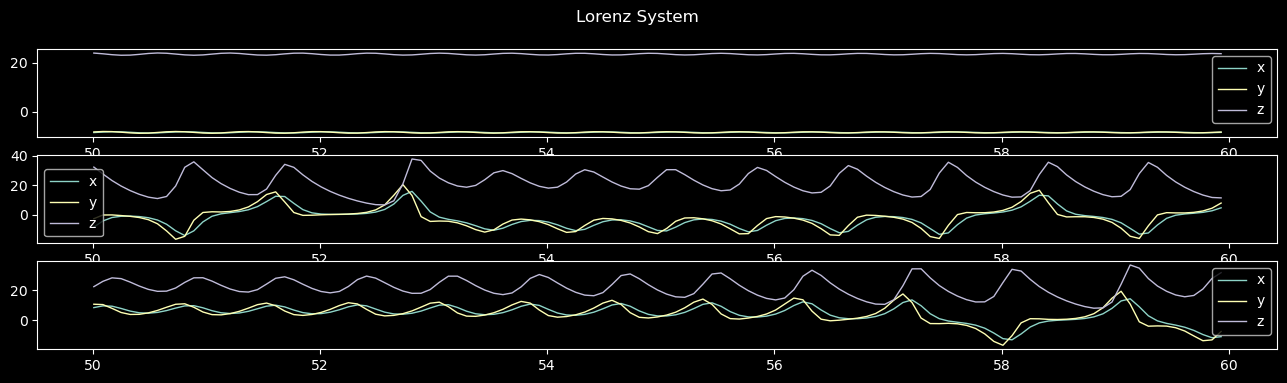

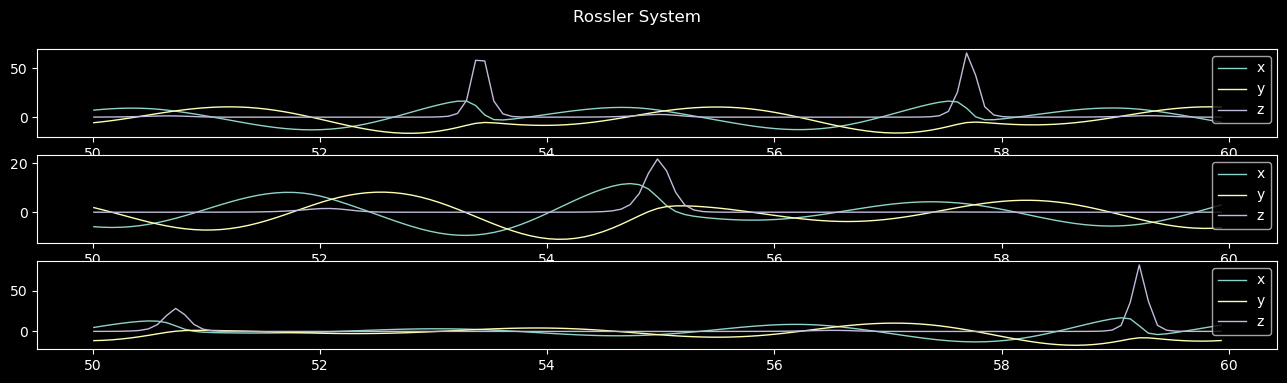

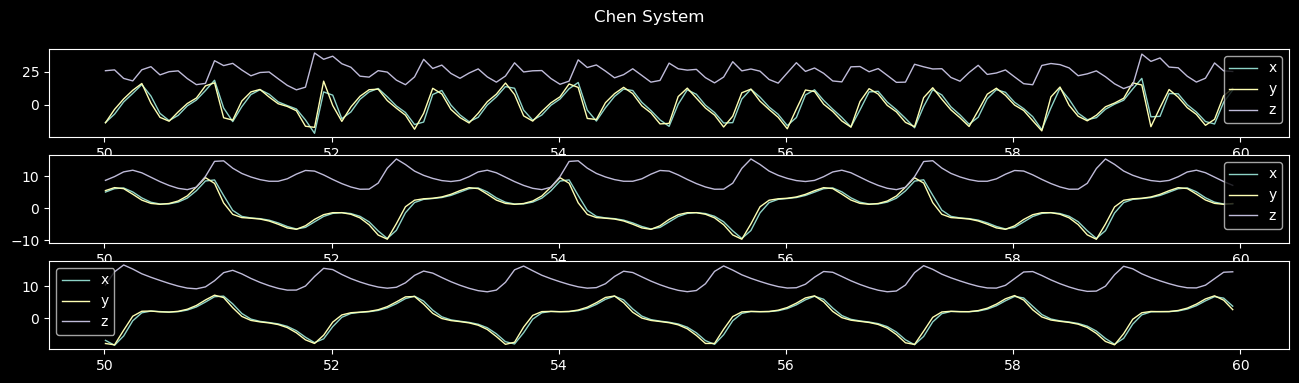

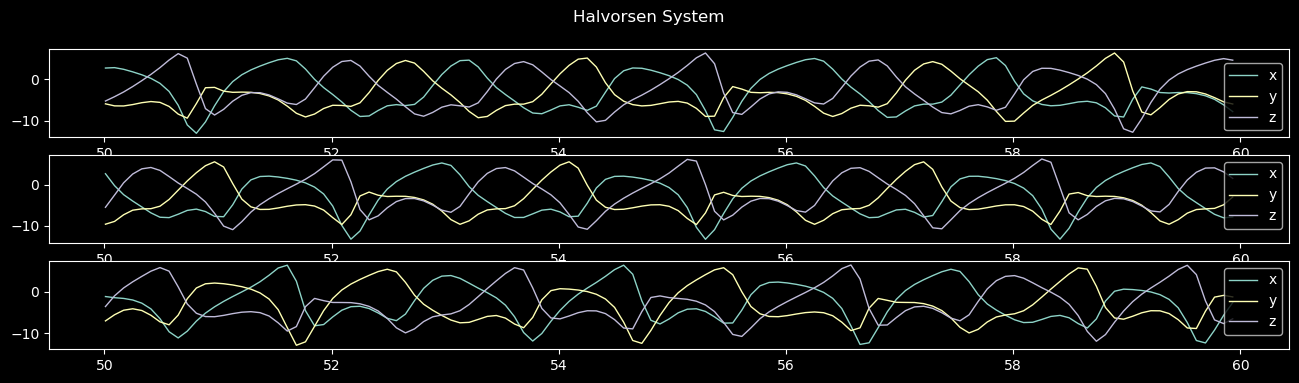

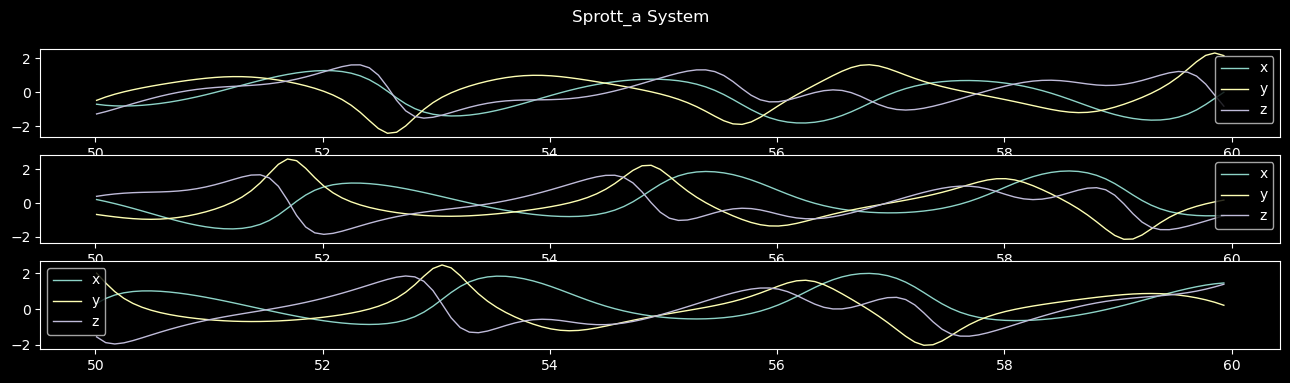

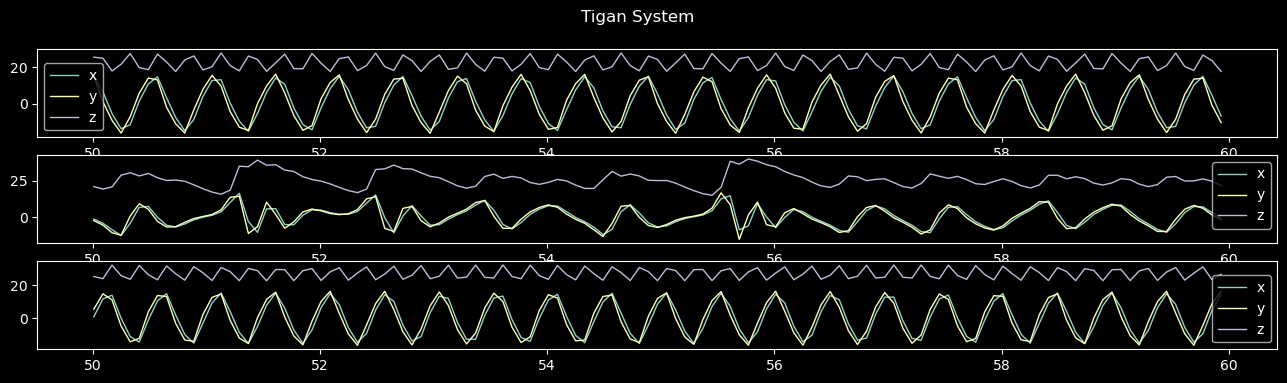

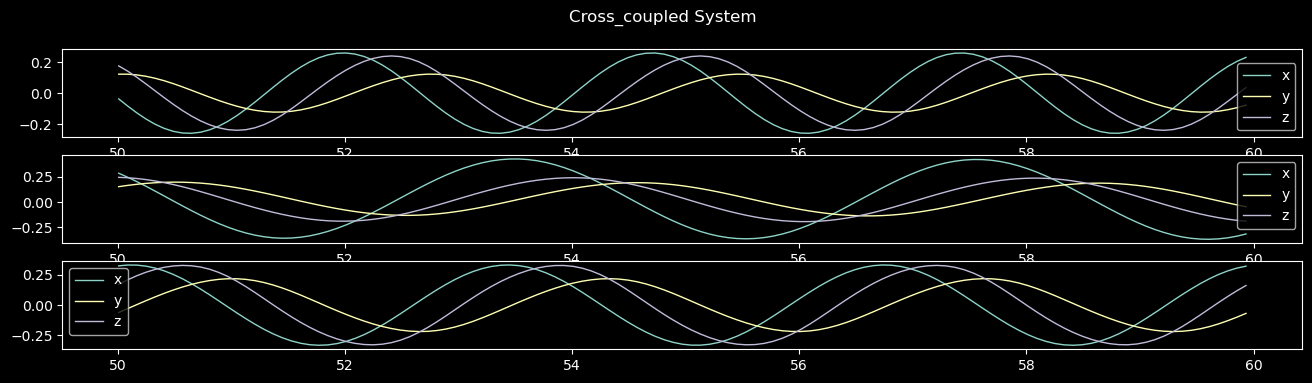

In [81]:
n_examples = 3
frac = 1/40
pos = 5
plot_3d_trajectories(dataset=dataset, n_examples=n_examples, frac=frac, pos=pos)

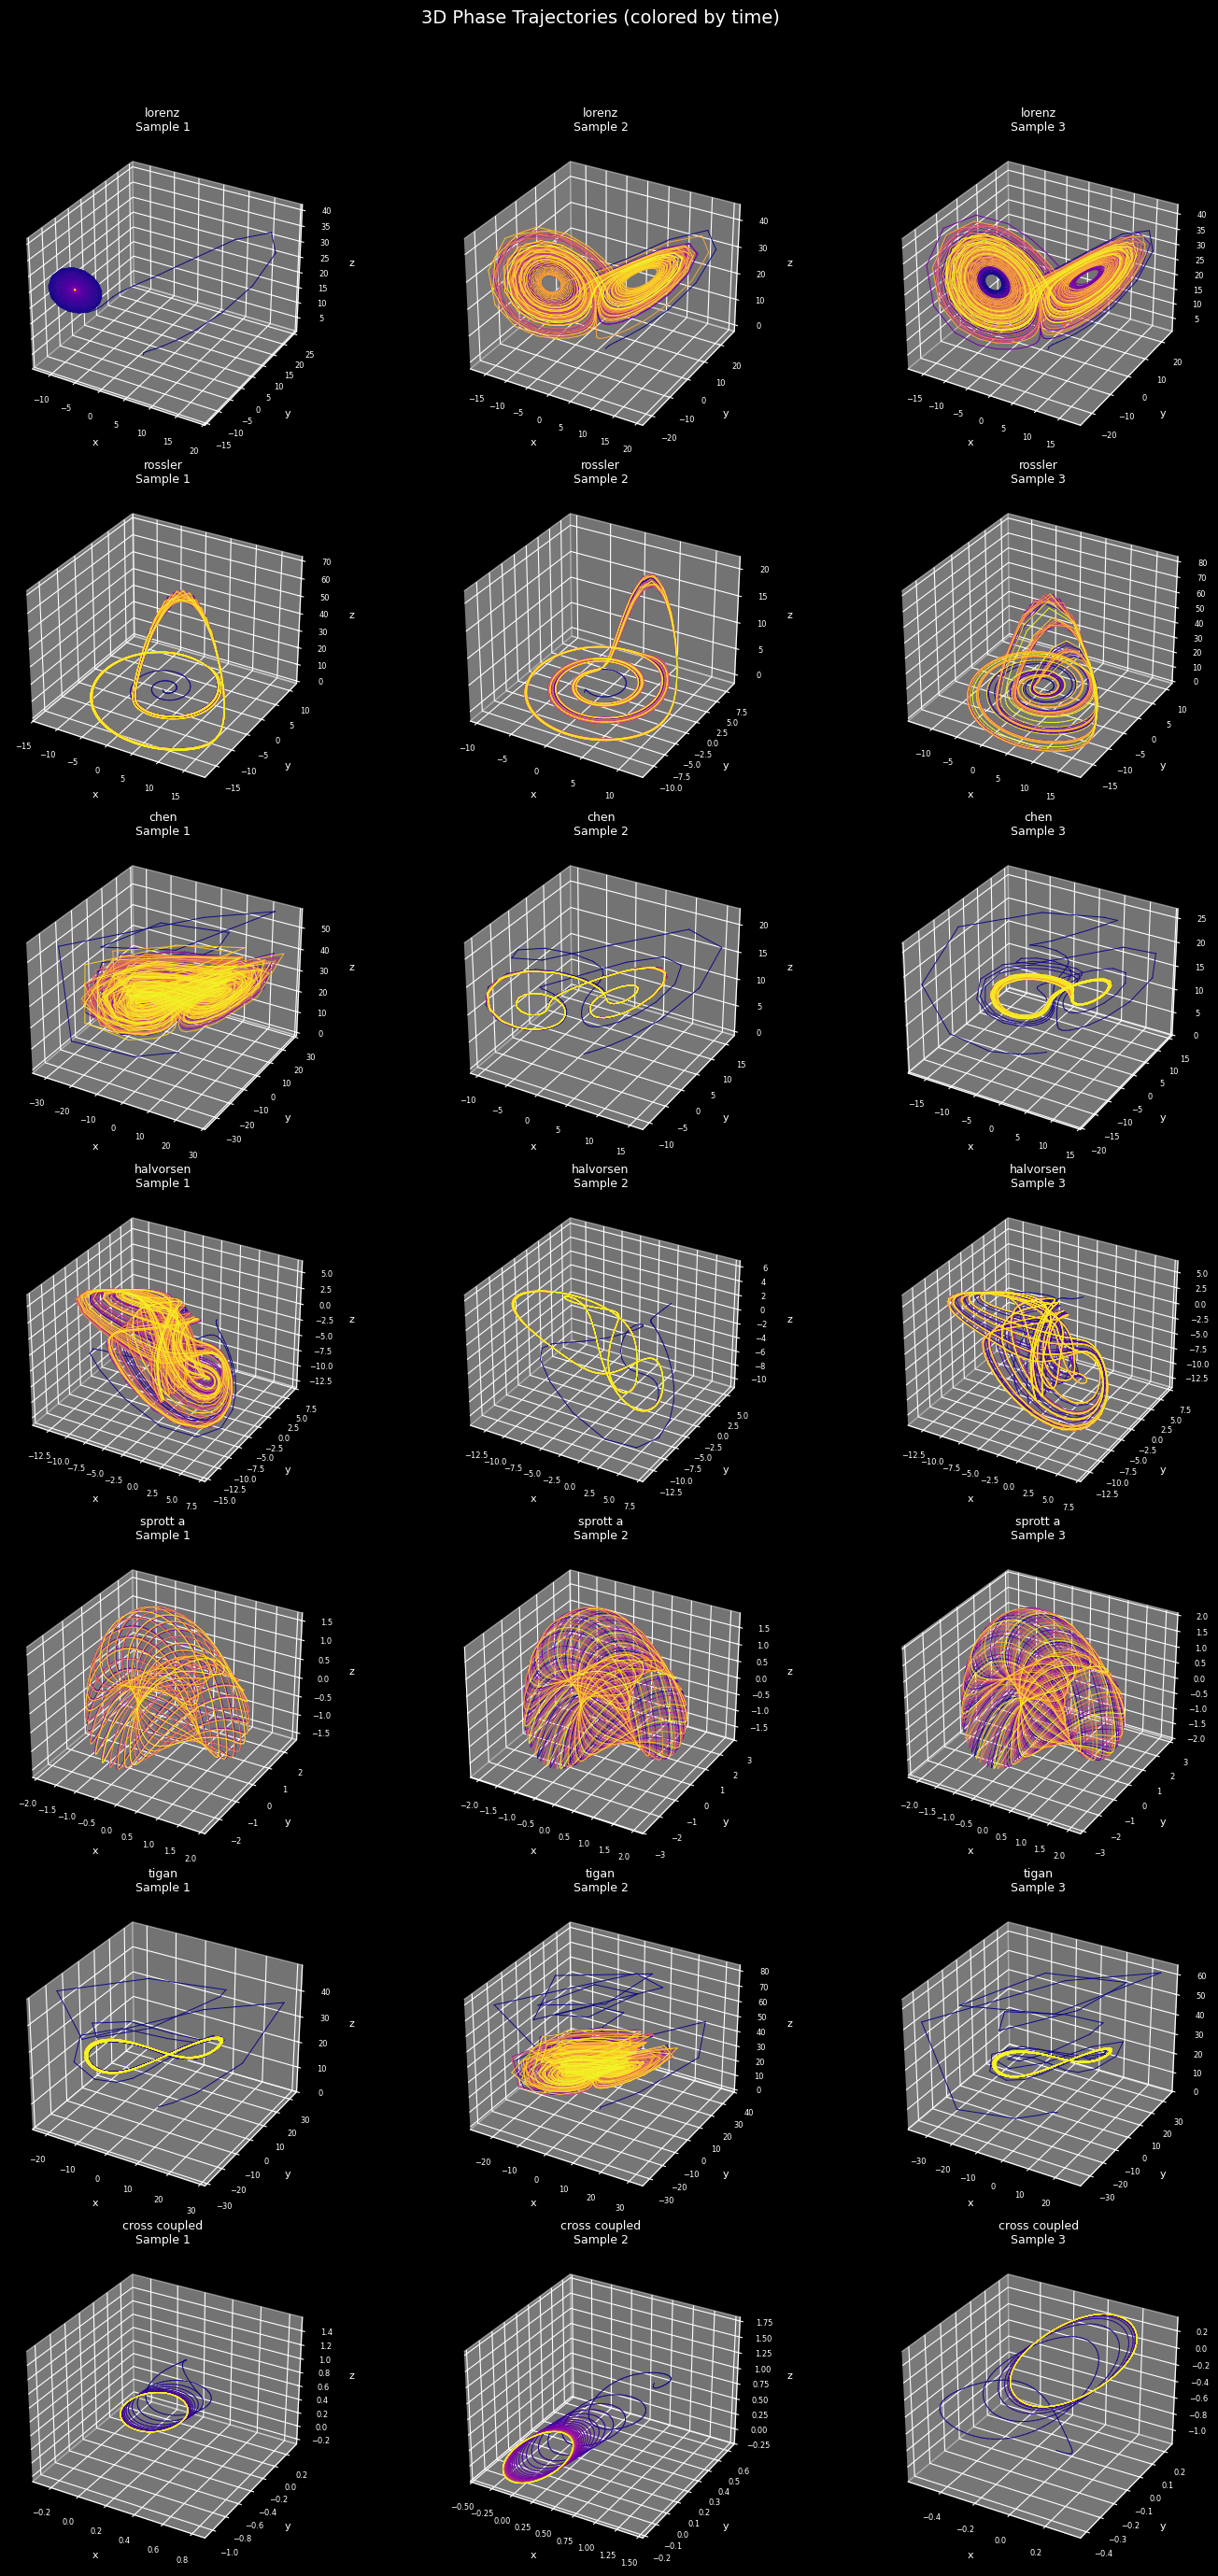

In [76]:
plot_3d_time_colored_trajectories(dataset, n_examples=3)